In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")
library(stringr)

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
no <-1:4
name <- c("Apple","Banana","Peach","Berry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

fruit<-data.frame(번호=no,제품=name,금액=price,수량=qty)
fruit
ls()


번호,제품,금액,수량
<int>,<chr>,<dbl>,<dbl>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


[1] "fruit" "name"  "no"    "price" "qty"

In [3]:
# 메모리 형태로 파일 보관
#save(no,fruit,name,file="../Data/testFruit.hwp")

rm(no,fruit,name) #메모리 삭제
ls()
load("../Data/testFruit.hwp")

[1] "price" "qty"

In [4]:
no

[1] 1 2 3 4

In [5]:
fruit

번호,제품,금액,수량
<int>,<chr>,<dbl>,<dbl>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [6]:
ls()


[1] "fruit" "name"  "no"    "price" "qty"

In [7]:
#fruit 를 csv 로 저장하기
write.csv(fruit,"../Data/fruit.csv",row.names =F)

In [8]:
read.csv("../Data/fruit.csv")

번호,제품,금액,수량
<int>,<chr>,<int>,<int>
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


### 세계 GDP 순위 데이터 정제 및 차트 만들기


In [9]:
GDP_ranking <- read.csv("../Data/GDP.csv")
head(GDP_ranking)
# row 1:4 는 필요없는 데이터
# col 3 은 알수없는 데이터 
# 맨 끝에 칼럼은 필요없음 
#-> data 정제 
GDP2<- GDP_ranking[-c(1:4),-c(3,ncol(GDP_ranking))]
head(GDP2)



,X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,,,NA,,,
2,,,NA,,(millions of,
3,,Ranking,NA,Economy,US dollars),
4,,,NA,,,
5,USA,1,NA,United States,"20,494,100",
6,CHN,2,NA,China,"13,608,152",


,X,Gross.domestic.product.2018,X.2,X.3
,<chr>,<chr>,<chr>,<chr>
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [10]:
#GDP2
g15<-GDP2[1:15,] # 상위 15개국만 선별
rownames(g15)<-1:15 # rowname 이 1부터 시작하게 만듦
head(g15)

,X,Gross.domestic.product.2018,X.2,X.3
,<chr>,<chr>,<chr>,<chr>
1,USA,1,United States,"20,494,100"
2,CHN,2,China,"13,608,152"
3,JPN,3,Japan,"4,970,916"
4,DEU,4,Germany,"3,996,759"
5,GBR,5,United Kingdom,"2,825,208"
6,FRA,6,France,"2,777,535"


In [11]:
# 컬럼 이름 정의 : Code, Ranking, Nation, GDP
colnames(g15)<-c("Code","Ranking","Nation","GDP")
# rownames 새로 구성하기 
rownames(g15) <-c(1:15) # c() 로 하면 초기화 됨. 
g15

,Code,Ranking,Nation,GDP
,<chr>,<chr>,<chr>,<chr>
1,USA,1,United States,"20,494,100"
2,CHN,2,China,"13,608,152"
3,JPN,3,Japan,"4,970,916"
4,DEU,4,Germany,"3,996,759"
5,GBR,5,United Kingdom,"2,825,208"
6,FRA,6,France,"2,777,535"
7,IND,7,India,"2,726,323"
8,ITA,8,Italy,"2,073,902"
9,BRA,9,Brazil,"1,868,626"


In [12]:
# 숫자에 ',' 가 찍혀있고 character type 임
# double type 으로 변환
g15$GDP<-as.double(str_remove_all(g15$GDP,",")); head(g15,6);

,Code,Ranking,Nation,GDP
,<chr>,<chr>,<chr>,<dbl>
1,USA,1,United States,20494100
2,CHN,2,China,13608152
3,JPN,3,Japan,4970916
4,DEU,4,Germany,3996759
5,GBR,5,United Kingdom,2825208
6,FRA,6,France,2777535


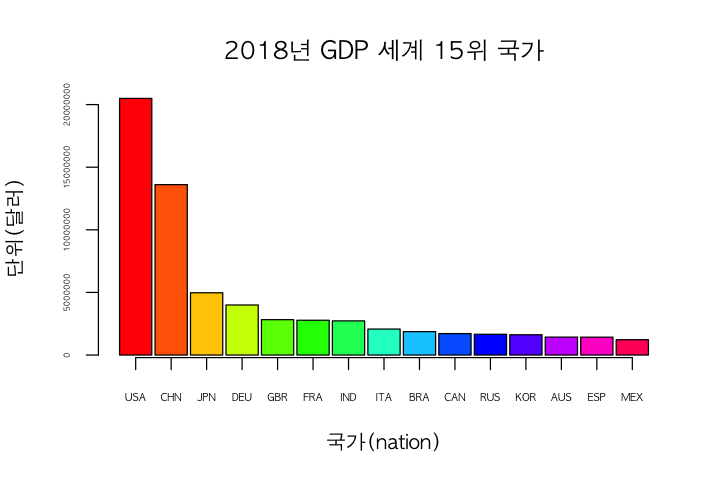

In [13]:
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
options(repr.plot.width  =6, repr.plot.height =4)
barplot(
    g15$GDP, # data
    main = "2018년 GDP 세계 15위 국가",  # main title
    #sub = "부제목",
    xlab = "국가(nation)",             # x axis 이름
    ylab = "단위(달러)",                # y axis 이름
    col = rainbow(nrow(g15)),         # 15개의 무지개 색상값 벡터
    names = g15$Code,                 # 범례
    cex.names =0.5,                   # 범례 크기 
    cex.axis =0.4,                    # y 축 수치 값 크기
    space =0.1,                       # 막대 사이간격
    axis.lty =1
)

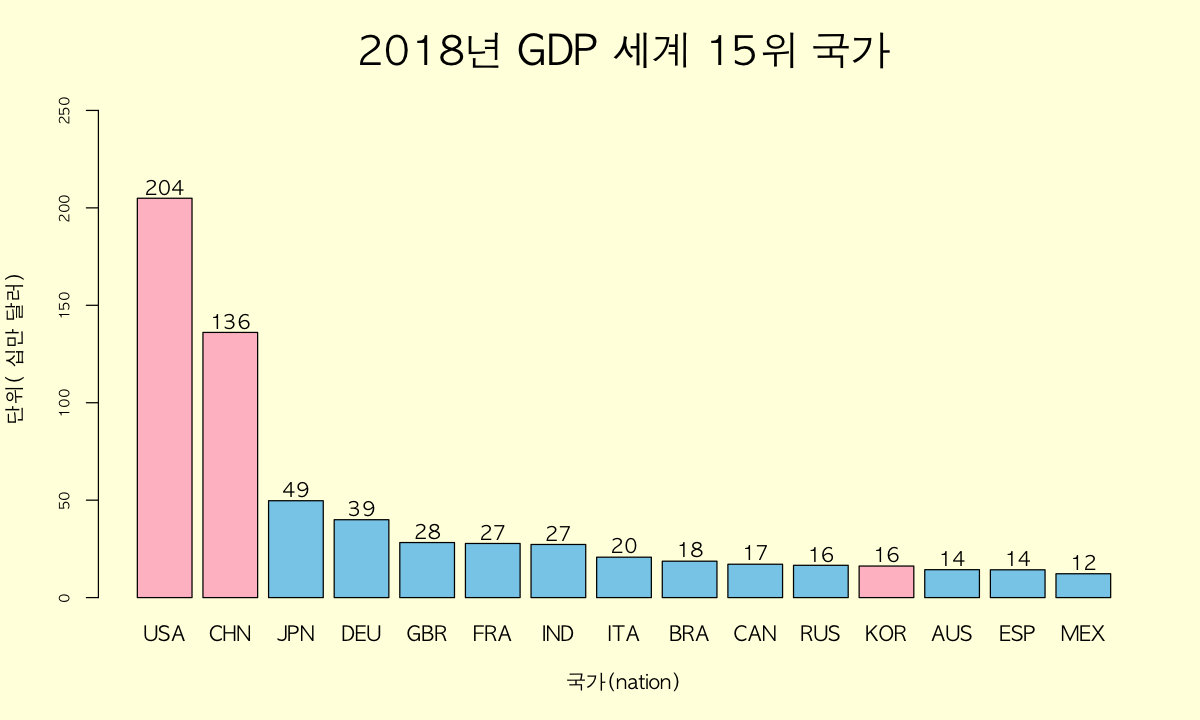

In [14]:
# 한국에 실정을 차트로 보여주겠다! 1등2등 빼면 만만함. 
# 미중한 은 빨간색으로 나머지 국가는 파란색으로 표현
options(scipen=100) # 지수 없애기
options(repr.plot.width = 10, repr.plot.height =6)

par(family ="AppleGothic",bg ='light yellow')
barplot(
    g15$GDP/100000, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위( 십만 달러)",
    col = ifelse(g15$Code==c("USA","CHN","KOR"),"pink","sky blue"),
    names = g15$Code,
    cex.axis =0.7,
    cex.main =2,
    #cex.names =0.5
    ylim = c(0,max(g15$GDP/100000)*1.25)
)
# GDP 수치 Bar top 에 표기
xpos_GdpVal =0.7                                # 첫 x position
for (nation_i in seq(1,length(g15$GDP),1)){     # 15개 국가 개수만큼 
    text(   xpos_GdpVal,                        # x position
            g15$GDP[nation_i]/100000+ 6,        # y position = gdp value + 5
            trunc(g15$GDP[nation_i]/100000))    # value
    xpos_GdpVal= xpos_GdpVal+1.2                # x position 이동 ->1.2
}


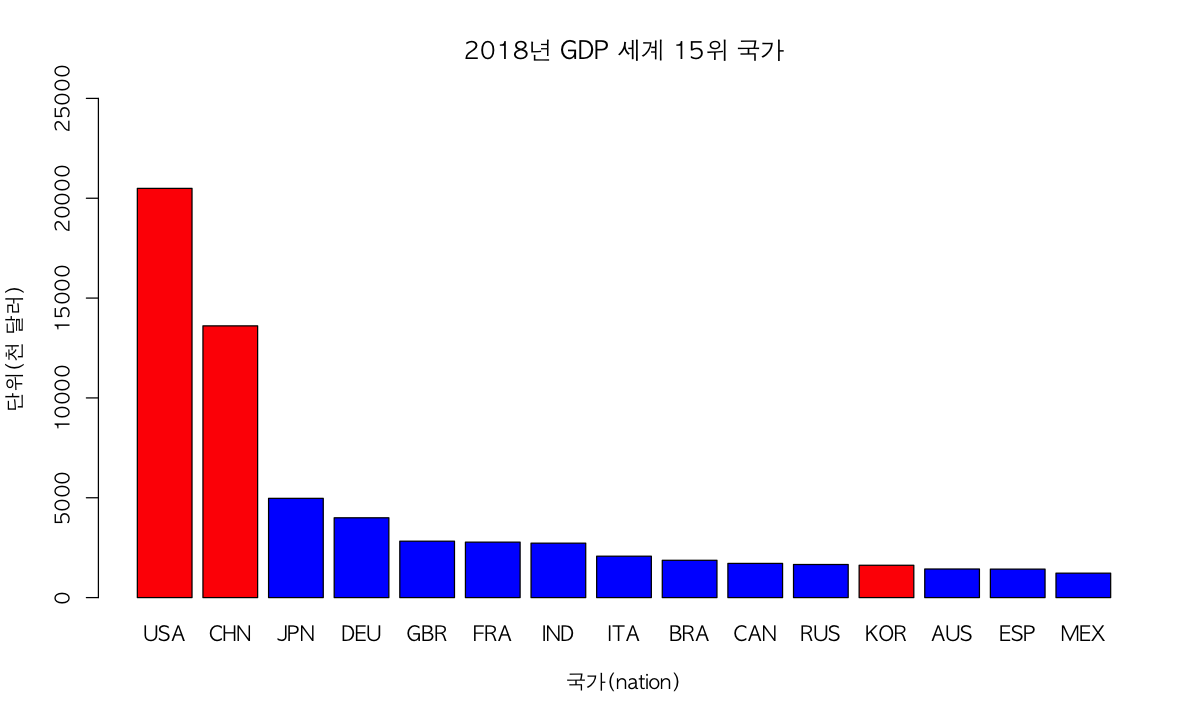

In [15]:
#단위를 천단위로 표시하기
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
barplot(
    g15$GDP/1000, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위(천 달러)",
    col = ifelse(g15$Code==c("USA","CHN","KOR"),"red","blue"),
    names = g15$Code,
    #cex.names =0.5
    ylim =c(0,25000)
)

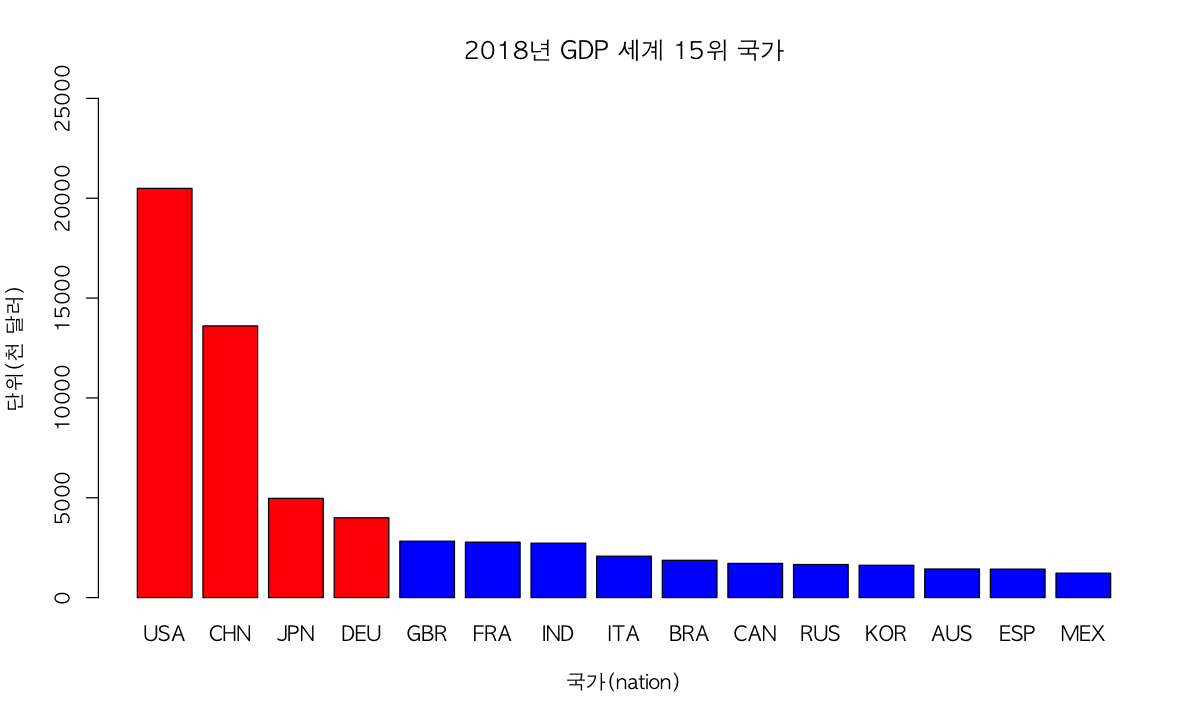

In [16]:
# GDP 가 3000000 이상인 국가만 빨간색으로 표시하기
#단위를 천단위로 표시하기
options(scipen=100) # 지수 없애기
par(family ="AppleGothic",bg ='white')
barplot(
    g15$GDP/1000, # data
    main = "2018년 GDP 세계 15위 국가",  #main title
    xlab = "국가(nation)", # x axis 이름
    ylab = "단위(천 달러)",
    col = ifelse(g15$GDP >= 3000000,"red","blue"),
    names = g15$Code,
    #cex.names =0.5
    ylim =c(0,25000)
)

---
# 데이터처리


In [17]:
# 데이터 정렬
# R 로도 머신러닝 할수있다 훨씬 빠르고 이쁘다 파이썬보다. 
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
#install.packages("dplyr")

In [19]:
library(dplyr)

In [20]:
# Sepal.Length 기준으로 오름차순 정렬하기 
#head(iris) # iris의 정렬순서는 Species 이다.  정렬의 기준은 무조건 target column 이다. 
head(arrange(iris,Sepal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,2.9,1.4,0.2,setosa
3,4.4,3.0,1.3,0.2,setosa
4,4.4,3.2,1.3,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.1,1.5,0.2,setosa


In [21]:
# Sepal.Length 기준으로 오름차순 정렬후 1열과 2열만 보기
arrange(iris[,1:2],Sepal.Length)

Sepal.Length,Sepal.Width
<dbl>,<dbl>
4.3,3.0
4.4,2.9
4.4,3.0
4.4,3.2
4.5,2.3
4.6,3.1
4.6,3.4
4.6,3.6
4.6,3.2


In [22]:
# Sepal.Length 기준으로 정렬후 동일한 크기를 가진 데이터 발생시 Petal.Length 기준으로 오름차순 정렬하기 

head(arrange(iris, Sepal.Length,Petal.Length))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,4.3,3.0,1.1,0.1,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setosa
4,4.4,2.9,1.4,0.2,setosa
5,4.5,2.3,1.3,0.3,setosa
6,4.6,3.6,1.0,0.2,setosa


In [23]:
#Sepal.Length 기준으로 내림차순 정렬
head(arrange(iris,desc(Sepal.Length)))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.9,3.8,6.4,2.0,virginica
2,7.7,3.8,6.7,2.2,virginica
3,7.7,2.6,6.9,2.3,virginica
4,7.7,2.8,6.7,2.0,virginica
5,7.7,3.0,6.1,2.3,virginica
6,7.6,3.0,6.6,2.1,virginica


In [24]:
# Sampling(중복값을 허용하지 않음)
a<- c(1,1,1,2)
sample(unique(a),1)
# 검증 test, 학습 할때의 데이터와 검증할때의 데이터가 달라야 할때 샘플링을 사용한다. 시험결과가 예측력이다. #


[1] 2

In [25]:
# 범위 체크
nrow(iris) #150
samp<-sample(1:nrow(iris), nrow(iris)*0.7) # iris index(rownames) sampling
irisTrain <- iris[samp,]
samp
head(irisTrain)

[1] 150

[1]  64 146  65 101  24   8  48   7  18  16  58  39  94 138 137 149  82 128
 [19] 148  34  46 103 115 123  68  12 110 140  66  55 145 106 117 120 119  54
 [37]  43 139  14  26   6  72  32 122 114  95 116  99  41  81  87 133  19  79
 [55]  15 104  74  33 129   4  88  84  75  78  53  97 131   9 102  62 126 111
 [73]  21   3 141  63  69 121 130  29  93 107  76  83  59  47  49  60  44 125
 [91]  89  51 143 144  96  77  56  90  50 113  38  91 108  37  71

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
64,6.1,2.9,4.7,1.4,versicolor
146,6.7,3.0,5.2,2.3,virginica
65,5.6,2.9,3.6,1.3,versicolor
101,6.3,3.3,6.0,2.5,virginica
24,5.1,3.3,1.7,0.5,setosa
8,5.0,3.4,1.5,0.2,setosa


In [26]:
# sampling 은 모집단의 특성을 닮아야한다
table(irisTrain$Species)  #빈도수가 species 와 동일하지 않음 -> 공부를 많이한 종은 예측확률이 더 좋아진다. 



    setosa versicolor  virginica 
        30         38         37 

In [27]:
# 특성별 샘플링
samp<- c(sample(1:50,35),sample(51:100,35),sample(101:150,35))
irisTrain<-iris[samp,]
table(irisTrain$Species)


    setosa versicolor  virginica 
        35         35         35 

In [28]:
nrow(irisTrain) #105

[1] 105

In [29]:
irisTest<-iris[-samp,] # R의 묘미 - 하면 빼고 나와준다는것!
nrow(irisTest)

[1] 45

In [30]:
# 데이터 개수는 맞추었는데 내용은 비슷할까?
summary(irisTrain); summary(irisTest) # 각 칼럼의 평균이 비슷하면 내용이 비슷하다. 

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.20   Min.   :1.000   Min.   :0.100   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.500   1st Qu.:0.300   versicolor:35  
 Median :5.800   Median :3.00   Median :4.300   Median :1.300   virginica :35  
 Mean   :5.831   Mean   :3.05   Mean   :3.758   Mean   :1.188                  
 3rd Qu.:6.400   3rd Qu.:3.40   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.20   Max.   :6.900   Max.   :2.500                  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.200   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.400  
 Median :5.700   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.871   Mean   :3.076   Mean   :3.758   Mean   :1.227  
 3rd Qu.:6.600   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.900  
 Max.   :7.700   Max.   :4.400   Max.   :6.700   Max.   :2.400  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

In [31]:
set.seed(1234)
samp <- c(sample(1:50,35),sample(51:100,35),sample(101:150,35))
irisTrain <- iris[samp,]
irisTest <- iris[-samp,]
summary(irisTrain); summary(irisTest)
head(irisTrain)


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,5.2,3.5,1.5,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
22,5.1,3.7,1.5,0.4,setosa
37,5.5,3.5,1.3,0.2,setosa
44,5.0,3.5,1.6,0.6,setosa
9,4.4,2.9,1.4,0.2,setosa


In [32]:
# 모집단에서 필요한 데이터만 추출하기 -> subset 으로 추출

#iris에서 Species 가 setosa 인것만 추출하여 iris_setosa라는 데이터 프레임 만들기

iris_setosa<- subset(iris, Species == 'setosa')
str(iris_setosa) # factor 가 정리가 안되어있음  나중에 히스토그램 만들때 빈칸이 보이게 됨
# factor 조정 
iris_setosa$Species <-factor(iris_setosa$Species); 
str(iris_setosa)


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [33]:
# iris 에서 Species가 versicolor인 것 만 추출하여 iris_versicolor라는 데이터 프레임 만들기
iris_versicolor<-subset(iris, Species == "versicolor")

# iris versicolor structure 구경
str(iris_versicolor)

# subset 으로 뽑으면 항상 rowname 을 초기화 시켜야한다. 
rownames(iris_versicolor) <- c(1:nrow(iris_versicolor)) # c() 로 해도 됨.(but 반복시 에러남)
head(iris_versicolor)

iris_versicolor$Speicies <-factor(iris_versicolor$Species) # type 을 바꿀때는 as.factor 로 리펙터링을 해준다. 
str(iris_versicolor)


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.0,3.2,4.7,1.4,versicolor
2,6.4,3.2,4.5,1.5,versicolor
3,6.9,3.1,4.9,1.5,versicolor
4,5.5,2.3,4.0,1.3,versicolor
5,6.5,2.8,4.6,1.5,versicolor
6,5.7,2.8,4.5,1.3,versicolor


'data.frame':	50 obs. of  6 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Speicies    : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...


In [34]:
# iris 에서 species가 setosa 이고 Sepal.Lenght 가 5 보다 큰 자료만 추출하기 
iris_setosaLt5<- subset(iris, Species == "setosa" & Sepal.Length>5)
rownames(iris_setosaLt5)<-c(1:nrow(iris_setosaLt5))

#Sepal Length , Petal Length 크기순 정렬
arrange(iris_setosaLt5, Sepal.Length,Petal.Length)
head(iris_setosaLt5); 

# refactoring
iris_setosaLt5$Species <- factor(iris_setosaLt5$Species)
str(iris_setosaLt5)


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
5.1,3.5,1.4,0.3,setosa
5.1,3.8,1.5,0.3,setosa
5.1,3.7,1.5,0.4,setosa
5.1,3.4,1.5,0.2,setosa
5.1,3.8,1.6,0.2,setosa
5.1,3.3,1.7,0.5,setosa
5.1,3.8,1.9,0.4,setosa
5.2,3.4,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,5.4,3.7,1.5,0.2,setosa
4,5.8,4.0,1.2,0.2,setosa
5,5.7,4.4,1.5,0.4,setosa
6,5.4,3.9,1.3,0.4,setosa


'data.frame':	22 obs. of  5 variables:
 $ Sepal.Length: num  5.1 5.4 5.4 5.8 5.7 5.4 5.1 5.7 5.1 5.4 ...
 $ Sepal.Width : num  3.5 3.9 3.7 4 4.4 3.9 3.5 3.8 3.8 3.4 ...
 $ Petal.Length: num  1.4 1.7 1.5 1.2 1.5 1.3 1.4 1.7 1.5 1.7 ...
 $ Petal.Width : num  0.2 0.4 0.2 0.2 0.4 0.4 0.3 0.3 0.3 0.2 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [35]:
# subset으로 컬럼 지우기
head(subset(iris, select= -Species))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


# 그룹연산 함수


In [36]:
#iris 에서 Species 별로 Sepal.Width의 평균을 구하시오 
summary(iris)
#head(iris); summary(iris); iris$Species
iris_setosa <- subset(iris, Species == "setosa"); 
iris_versicolor <- subset(iris, Species == "versicolor");
iris_virginica <- subset(iris, Species == "virginica"); 

mean(iris_setosa$Sepal.Width)
mean(iris_versicolor$Sepal.Width)
mean(iris_virginica$Sepal.Width)

iris_setosa



  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

[1] 3.428

[1] 2.77

[1] 2.974

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [37]:
#  Grouping 종류별로 Sepal width 의 mean을  보고싶을 때 
aggregate(Sepal.Width~Species, iris, mean)

Species,Sepal.Width
<fct>,<dbl>
setosa,3.428
versicolor,2.770
virginica,2.974


---
# 서울시 자치구별 교통사고 데이터

In [38]:
seoul<-read.csv("../Data/newSeoul2019.csv")
#test의 자료구조 확인하기
checkData <- function(data){
    cat("<<----------data 구조---------->>\n");
    str(data);
    cat("<<----------data HEAD---------->>\n");
    print(head(data));
    cat("<<----------data TAIL---------->>\n");
    print(tail(data))
    cat("<<----------data Summary---------->>\n");
    # test 의 기본 통계량 보기
    cat(summary(data))

    cat("NA 개수:", sum(is.na(data)))
    
}

In [39]:
checkData(seoul)

<<----------data 구조---------->>
'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: chr  "종로구" "종로구" "종로구" "종로구" ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...
<<----------data HEAD---------->>
  년도 월 자치구명 발생건수 사망자수 부상자수
1 2011  1   종로구      115        2      165
2 2011  2   종로구       99        0      134
3 2011  3   종로구      116        0      162
4 2011  4   종로구      110        1      153
5 2011  5   종로구      122        0      157
6 2011  6   종로구      116        3      163
<<----------data TAIL---------->>
     년도 월 자치구명 발생건수 사망자수 부상자수
2695 2019  7   강동구      146        2      189
2696 2019  8   강동구      127        2      175
2697 2019  9   강동구       98        2      137
2698 2019 10   강동구      108        1      144
2699 2019 11   강동구      146        0      199
2700 20

In [40]:
# 컬럼 별 na 확인

for(i in 1:ncol(seoul)){
    cat("col: ",colnames(seoul[i]), "na 개수:",(sum(is.na(seoul[,i]))),"\n")
}

colSums(is.na(seoul)) ## 컬럼별 합계 계산 함수. 

col:  년도 na 개수: 0 
col:  월 na 개수: 0 
col:  자치구명 na 개수: 0 
col:  발생건수 na 개수: 0 
col:  사망자수 na 개수: 0 
col:  부상자수 na 개수: 0 


년도       월 자치구명 발생건수 사망자수 부상자수 
       0        0        0        0        0        0

In [41]:
## 마지막으로 이상체크는 데이터가 골고루 있는지를 체크해주어야한다. 

#년도
table(seoul$년도)
#월
table(seoul$월)
# 자치구명 (Na 가아닌것)
sum(ifelse(is.na(names(table(seoul$자치구명))),0,1))
# 자치구 수
length(unique(seoul$`자치구명`))



2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 

[1] 25

[1] 25

In [42]:
#자치구별 발생건수의 평균
head(seoul)
regionAcc.mean<-arrange(aggregate(발생건수~`자치구명`,seoul,mean), desc(발생건수)) # 종속변수 ~ 독립변수,data, 함수 
regionAcc.mean

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163


자치구명,발생건수
<chr>,<dbl>
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185


In [43]:
# 자치구별 표준편차
regionAcc.sd<-arrange(aggregate(발생건수~자치구명, seoul,sd),desc(발생건수))
#regionAcc.sd

# 변동계수, 계수값이 있어야한다. 
# 변동계수 = 표준편차 /평균 : 변동계수가 작으면 일정하다. 
# 변동계수가 크면 왔다갔다 변동폭이 크다. => 사건이 한꺼번에 몰린다는 소리
# 매장 메뉴 세개 항목에 대해서  자주발생하는지 드문드문 발생하는지 알수있다. 
# 자주팔리는 메뉴 알수있다. 
# 강동구는 고속도로가 연결되어 있어서 변동계수가 크다. 
regionAcc.cv <-regionAcc.sd$발생건수 / regionAcc.mean$발생건수
#regionAcc.cv
regionAcc <-data.frame(자치구명= regionAcc.mean$자치구명, 변동계수 =regionAcc.cv)
arrange(regionAcc, 변동계수)


자치구명,변동계수
<chr>,<dbl>
강남구,0.1074865
영등포구,0.1214682
서초구,0.1228647
송파구,0.1341341
관악구,0.1410758
구로구,0.1411848
노원구,0.1419551
중랑구,0.1420351
강동구,0.1436891


In [44]:
# 서울시 교통사고 부상자수에 대한 변동계수 구하기

#평균
regionInjure.mean <- arrange(aggregate(부상자수~자치구명, seoul, mean), desc(부상자수)); #regionInjure.mean
# 표준편차
regionInjure.sd <- arrange(aggregate(부상자수~자치구명, seoul, sd), desc(부상자수)); #regionInjure.sd
# 변동계수
regionInjure.cv <-round(regionInjure.sd[,2]/regionInjure.mean[,2] , 2) 
#DataFrame
regionInjure <- data.frame( 자치구명 =regionInjure.mean$자치구명,
                            변동계수 = regionInjure.cv); 
arrange(regionInjure, 변동계수)

자치구명,변동계수
<chr>,<dbl>
강남구,0.11
송파구,0.13
영등포구,0.13
서초구,0.14
성북구,0.15
관악구,0.15
마포구,0.16
구로구,0.16
양천구,0.16


In [45]:

# 교통사고 발생건수와 부상자수의 관계 : 상관관계 
cor(seoul$`발생건수`, seoul$`부상자수`)
# 0~0.3 : 상관없음. 
# 0.3 ~ 0.5 : 약한관계
# 0.5~0.7 : 관계
# 0.7~  : 강한관계 

[1] 0.9808932

In [46]:
# 교통사고 발생건수와 사망자수 관계
cor(seoul$`발생건수`,seoul$`사망자수`) # 상관이 없으면 선진국!
cor(seoul$`발생건수`,seoul$`년도`) # 년도는 숫자크기가 있어서 보면 안된다!! - 상관관계는 역상관이다 x 형

cor(seoul$부상자수, seoul$`사망자수`)


# 관련이 없으면 회귀식은 불가능하다. 

[1] 0.2387148

[1] -0.03593207

[1] 0.2373019


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.154  -9.797  -1.421   7.611  87.718 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -5.895918   0.794301  -7.423    0.000000000000153 ***
X            1.450495   0.005539 261.890 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.23 on 2698 degrees of freedom
Multiple R-squared:  0.9622,	Adjusted R-squared:  0.9621 
F-statistic: 6.859e+04 on 1 and 2698 DF,  p-value: < 0.00000000000000022


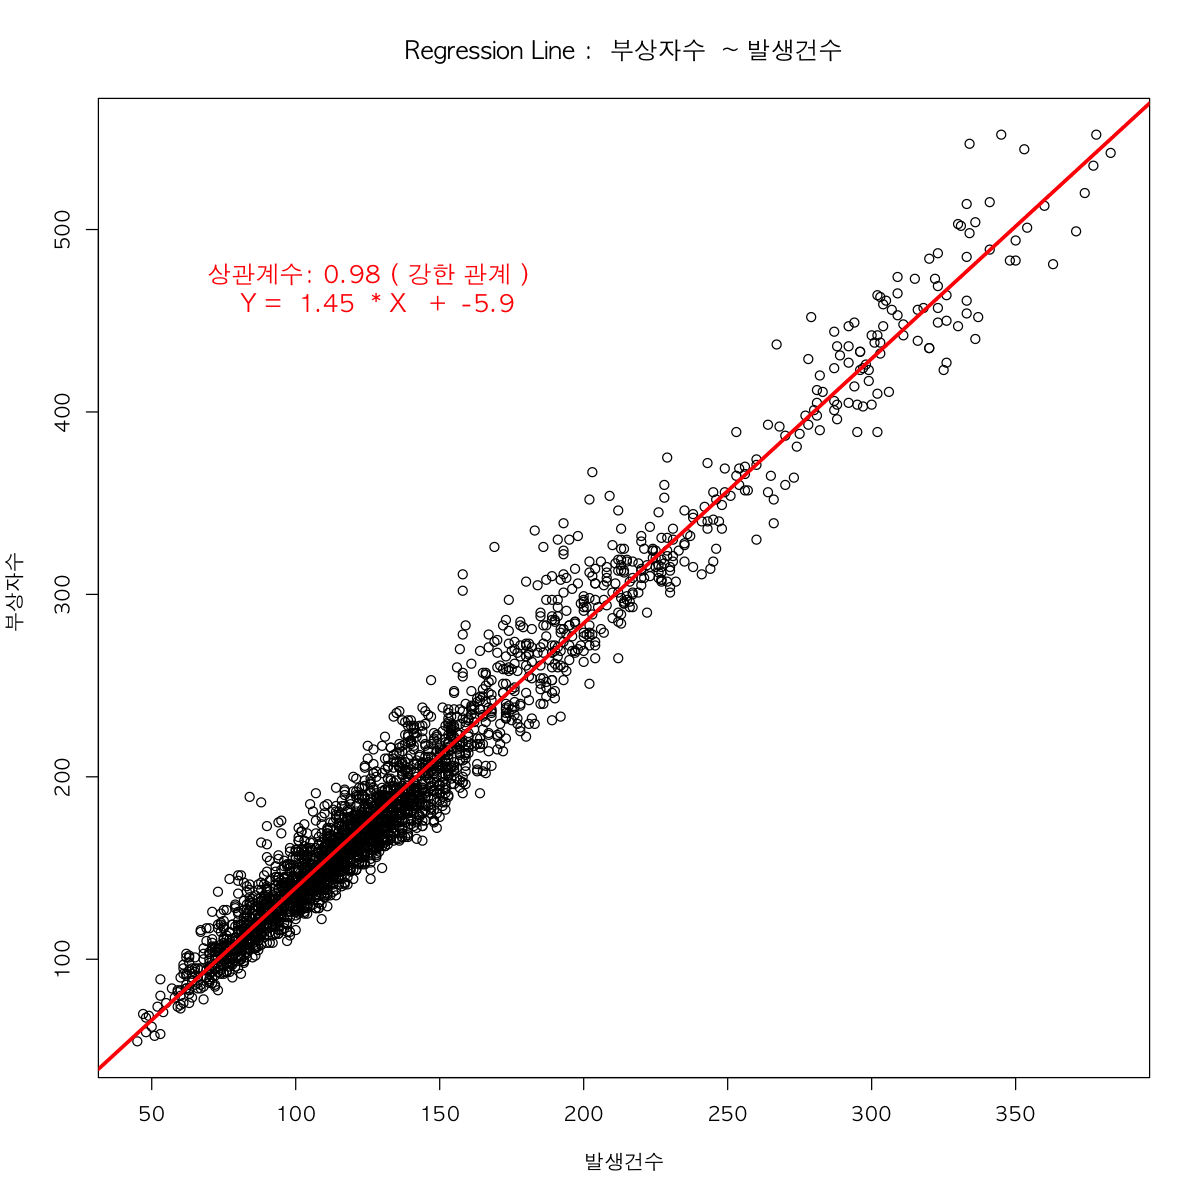

In [142]:
# 발생건수와 부상자수의 산포도 그리기
corPlot<- function(X,Y,xylab){
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    par(family ="AppleGothic",bg='white')
    options(warn =-1,
        repr.plot.width = 10,
        repr.plot.height = 10
        )
    # X,Y 는 vector 임
    plot(Y~X, 
        main =paste("Regression Line : ", xylab[2],"~",xylab[1]),
        xlab = xylab[1],
        ylab = xylab[2]
    )
    regline <- lm(Y~X);regline # fitting liner
    abline(regline,col ="red",lwd =3)
    
    # 상관관계 
    if( round(cor(X,Y),2) > 0.7){
            relation <- "강한 관계"
        }else if(round(cor(X,Y),2)>0.5){
            relation <- "일반 관계"
        }else if (round(cor(X,Y),2)>0.3){
            relation <- "약한 관계"
        }else{
            relation <- "관계 없음"
        }
    
    text(   max(X)%/%3, max(Y)%/%7*6,
            paste(
            "상관계수:",round(cor(X,Y),2), "(",relation  , ")","\n",
            "Y = ",round(coefficients(regline)[2],2)," * X",
            "  + ",round(coefficients(regline)[1],2)
            )
            , sep ="" ,col = "red", cex =1.2)
    summary(regline)
    
}
corPlot(seoul$`발생건수`,seoul$`부상자수`, c("발생건수","부상자수 "))


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4987 -0.9931 -0.1362  0.7896  8.7578 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 0.5000152  0.0595446   8.397 <0.0000000000000002 ***
X           0.0053015  0.0004152  12.769 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.142 on 2698 degrees of freedom
Multiple R-squared:  0.05698,	Adjusted R-squared:  0.05664 
F-statistic:   163 on 1 and 2698 DF,  p-value: < 0.00000000000000022


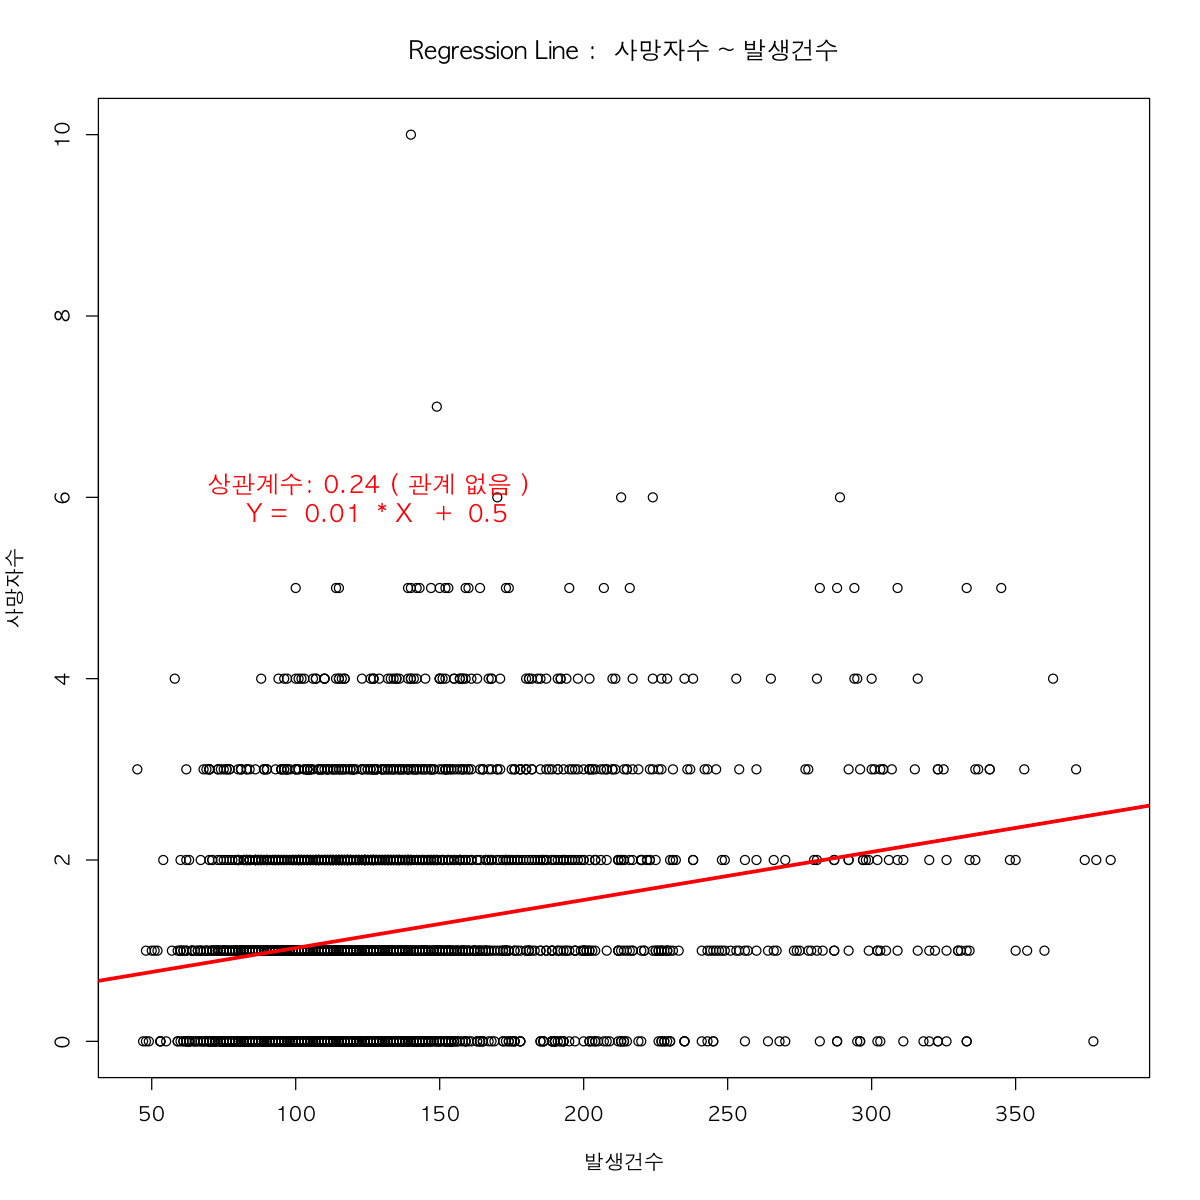

In [143]:
par(family ="AppleGothic",bg='white')
# 발생건수와 부상자수의 산포도 그리기
corPlot(seoul$`발생건수`,seoul$`사망자수`,c("발생건수","사망자수"))

In [49]:
# 서울시 교통사고 사망자수에 대한 변동계수 구하기 

#평균
regionDeath.mean <- arrange(aggregate(사망자수~자치구명, seoul, mean), desc(사망자수)); regionDeath.mean
# 표준편차
regionDeath.sd <- arrange(aggregate(사망자수~자치구명, seoul, sd), desc(사망자수)); #regionInjure.sd
# 변동계수
regionDeath.cv <-round(regionDeath.sd[,2]/regionDeath.mean[,2] , 2) 
#DataFrame
regionDeath <- data.frame( 자치구명 =regionDeath.mean$자치구명,
                            변동계수 = regionDeath.cv); 
arrange(regionDeath, 변동계수)

자치구명,사망자수
<chr>,<dbl>
영등포구,2.0370370
강남구,1.7962963
송파구,1.7407407
강서구,1.5462963
서초구,1.5092593
동대문구,1.4814815
마포구,1.3611111
구로구,1.2962963
강동구,1.2870370


자치구명,변동계수
<chr>,<dbl>
영등포구,0.71
강남구,0.79
송파구,0.81
동대문구,0.87
서초구,0.88
강서구,0.90
마포구,0.92
강동구,0.92
관악구,0.92
